In [14]:
import matplotlib.pyplot as plt
import numpy as np

from texas_holdem import (
    deck,
    field,
    player,
    role,
    winner,
)

In [50]:
class Game:
    """class説明のタイトル
    classの説明文を記入

    Attributes:
        cards (list)    : cardオブジェクトをリストで保持します

    Examples:
        >>> game = Game()
        >>> game.progress() # ゲームスタート
    """

    def __init__(self, number_of_players=2):
        self.number_of_players = number_of_players
        self.players = []
        self.game_deck = deck.Deck()
        self.game_field = field.Field()

    def deal(self):

        for i in range(self.number_of_players):
            self.players.append(player.Player('player' + str(i+1)))

        for i in range(self.number_of_players):
            for j in range(2):
                self.players[i].draw(self.game_deck)                
                
    def preflop(self):
        pass

    def flop(self):
        self.game_field.flop(self.game_deck)
        flop_card = self.game_field.community_card
        return flop_card

    def turn(self):
        self.game_field.turn(self.game_deck)
        turn_card = self.game_field.community_card[-1]
        return turn_card

    def river(self):
        self.game_field.river(self.game_deck)
        river_card = self.game_field.community_card[-1]
        return river_card

    def showdown(self):
        print(self.game_field.show_card())
        for i in range(self.number_of_players):
#             print("Player Name: {}".format(self.players[i].name))
#             print(self.players[i].show_hand())
            pass

    def judge_role(self):
        for i in range(self.number_of_players):
            self.game_role = role.Role()
            hand = self.players[i].hand + self.game_field.community_card
            self.game_role.judge(hand)
            self.players[i].role = self.game_role.role
            self.players[i].hand = self.game_role.hand

    def result_draw(self):
        print('Draw')

    def judge_winner(self):
        game_winner = winner.Winner(self.players)
        winner_index = game_winner.judge()
        if winner_index == -1:
#             self.result_draw()
            return 'Draw'
        else:
#             print(self.players[winner_index].name)
            return self.players[winner_index].name

    # ゲーム全体の進行
    def progress(self,
            preflop=False,
            flop=False,
            turn=False,
            river=False,
            winner=False):
        self.deal()
        self.preflop()
        flop_card = self.flop()
        turn_card = self.turn()
        river_card = self.river()
        self.showdown()
        self.judge_role()
        winner_player = self.judge_winner()
        if preflop:
            pass

        if flop:
            return flop_card

        if turn:
            return turn_card

        if river:
            return rever_card

        if winner:
            return winner_player

## only once

In [51]:
game = Game()
winner_player = game.progress(winner=True)

C11
S11
H3
H11
S13
None


In [52]:
winner_player

'player2'

## one hundred times

In [6]:
winner_player_list = []
for i in range(100):
    game = Game()
    winner_player_list.append(game.progress(winner=True))

S11
C9
S6
S8
D6
None
C11
D5
D8
H12
S1
None
C13
S7
D3
H12
H11
None
C8
C2
S6
H2
D8
None
C2
D9
D1
H3
S10
None
C8
C12
C10
C7
C5
None
H5
S10
S4
D11
S7
None
C12
D5
H5
C10
S4
None
H5
H6
D3
H8
C10
None
S7
S12
H9
D13
C11
None
C12
C9
D7
S11
H13
None
S4
D12
C1
H10
D6
None
D5
S1
S12
D2
H4
None
D11
D3
C4
S9
C8
None
H10
C4
C5
C10
D10
None
C5
H6
H1
D11
D2
None
C2
D6
H12
C9
D2
None
S3
H1
C12
C5
C8
None
D6
S13
S11
C4
D8
None
S6
S12
H10
H6
H11
None
S11
S2
C12
H13
C9
None
H12
C1
D1
C12
H6
None
D1
H5
H10
C8
S6
None
C7
D1
H10
S2
C2
None
S5
C12
D5
S9
S11
None
H5
D1
D12
D4
S13
None
S13
D7
C6
S5
C11
None
S7
D9
D1
H3
H2
None
S5
D11
H3
D1
S4
None
D6
D11
D1
S8
D5
None
D3
H4
S9
S6
H9
None
D12
H5
S11
C9
C3
None
D6
C1
H10
H2
H1
None
H11
D2
S3
H3
D8
None
C6
S4
H10
C4
H8
None
C3
C4
D9
S5
H4
None
S2
H5
C1
H12
H11
None
C5
S5
D13
D7
C9
None
C4
H4
C7
C1
H8
None
H6
H3
S12
H7
H8
None
S1
C5
H4
S13
D5
None
S13
S7
H7
S3
C9
None
D1
C5
H7
H3
C6
None
C8
D4
D2
C9
D11
None
S11
H5
C13
S10
H9
None
C9
S3
C11
H4
C2
None
S3
S11
D1
H11


(-1.100330241279501,
 1.1069345654278222,
 -1.109697898671973,
 1.1004618046986654)

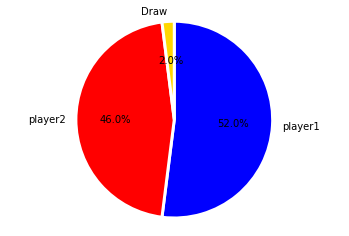

In [7]:
win_p1 = winner_player_list.count('player1')
win_p2 = winner_player_list.count('player2')
draw = winner_player_list.count('Draw')
count_of_all = win_p1 + win_p2 + draw

label = ['player1', 'player2', 'Draw']
colors = ['blue', 'red', 'gold']
x = np.array([win_p1, win_p2, draw])
plt.pie(x, labels=label, counterclock=False, startangle=90, colors=colors,
       wedgeprops={'linewidth': 3, 'edgecolor':"white"}, autopct="%1.1f%%")
plt.axis('equal')

## one thousand

In [8]:
winner_player_list = []
for i in range(1000):
    game = Game()
    winner_player_list.append(game.progress(winner=True))

D13
H9
D9
C9
S10
None
H1
D9
S13
C5
C13
None
D6
C6
S6
C10
S13
None
D7
D4
D5
C2
D8
None
S13
H8
C6
S9
C11
None
S6
D3
S1
S5
H3
None
D13
D12
S8
C11
S13
None
C5
D13
S3
H1
C4
None
D2
S10
C8
C3
H1
None
S5
H3
H12
C7
C11
None
D2
C6
H6
S6
D8
None
H8
D9
S13
C10
D3
None
S3
D10
C6
S9
H2
None
D2
S4
S5
D5
D13
None
S3
H8
C10
D4
C4
None
H13
H7
H4
S3
D3
None
C9
D5
H5
C7
C6
None
D4
D1
C13
C1
D3
None
H3
D1
C11
H4
D6
None
D5
C11
C10
D11
H6
None
D4
D7
H11
D13
H5
None
S12
S2
D9
C11
D3
None
D1
C3
H9
C6
S3
None
C4
D7
C10
D2
C9
None
S2
D8
S13
C12
H9
None
D5
S10
S5
S4
C9
None
C4
C5
S12
D10
D6
None
C10
C4
H5
D4
H12
None
C1
D10
S10
H9
S2
None
H3
H1
S6
S8
D4
None
H7
C5
C12
S1
D10
None
H11
S1
H5
D10
D2
None
C6
S2
S9
C5
C2
None
D7
H3
C11
C8
S10
None
D3
D10
C2
C9
C8
None
C7
S3
D7
D6
S6
None
H9
D4
H11
C8
S10
None
D5
C9
S4
S5
C6
None
C5
C6
C10
H1
D6
None
D13
S5
D9
H2
D7
None
H8
S11
C11
C6
S6
None
H12
S7
H5
C7
H2
None
S5
D11
D3
D10
D13
None
C11
S3
S2
S9
S5
None
H13
D10
C12
H5
C7
None
S1
S2
S6
H9
C4
None
S11
C11
H10
D11
H5

D7
None
S1
H8
C13
H6
C7
None
C8
D2
H6
C6
C3
None
C9
C13
S6
H9
H13
None
D5
H2
C1
C2
S11
None
H7
D12
H1
C12
S4
None
S1
H3
S6
H10
D10
None
H5
C9
D2
D12
H8
None
D8
C10
D13
H6
H7
None
S4
S11
D10
S2
H3
None
S11
S10
C10
D2
S13
None
C5
C9
H6
D6
S5
None
D8
H3
S3
S4
H9
None
D9
S9
H13
H7
C10
None
D4
D3
C1
H7
S13
None
S4
H2
S13
H13
H12
None
C4
H11
C12
D9
H12
None
S5
S3
C1
H2
S11
None
D3
C5
C1
C3
D6
None
C9
D3
C4
D6
H6
None
S11
C12
S6
H4
H10
None
D12
D2
D10
C5
S8
None
S8
S13
H10
C1
D13
None
D1
D8
C5
H4
C12
None
D9
S6
D4
D2
H13
None
S12
C7
D12
H8
H13
None
C3
H8
H13
C10
C13
None
S3
H11
C3
C2
C10
None
C2
D7
D6
D5
S1
None
C11
S12
D10
S13
S10
None
D9
S3
H12
C6
S11
None
C1
C4
H12
H10
H3
None
S13
S9
S7
S6
S2
None
S10
S7
C2
H7
H8
None
C9
C10
H13
H4
D3
None
H5
D12
S9
C1
D6
None
D4
S12
H9
H2
D10
None
D12
H8
D6
D3
C13
None
H6
H1
S13
S12
D7
None
H8
C13
S1
D1
C10
None
S12
D1
S11
S1
D11
None
H13
S5
D12
D13
D10
None
H7
D13
D2
S2
S3
None
H2
D7
D11
H4
S9
None
C8
S3
S6
S8
C5
None
C12
H5
H4
C3
C6
None
S10
H3
S7
S2
C1

C8
H7
None
S10
S2
C13
C5
H9
None
S9
D7
H6
S10
C8
None
S1
C8
C1
D2
H8
None
H5
H9
D5
D4
S13
None
D13
S7
H13
C9
C2
None
C5
C10
D3
H3
S5
None
C12
C8
H6
C10
S4
None
D9
S6
S9
C8
S5
None
C8
S9
H10
S7
C11
None
D7
D13
S6
S5
C12
None
H9
C13
C1
H6
C10
None
C3
H2
C7
S7
H12
None
D3
C1
H12
C7
S7
None
S12
D1
C2
H2
C11
None
D9
H5
C3
S1
C13
None
C5
D13
S11
D4
S10
None
C13
D9
C10
D1
C5
None
H10
S13
D10
C10
C12
None
D6
H11
S5
C5
C12
None
S1
D5
H6
S8
D9
None
S13
S2
D10
C13
H13
None
H3
C12
H12
C13
D7
None
C4
S6
H3
D8
C12
None
C5
D8
S9
C7
H6
None
H9
H2
D11
S6
C9
None
C6
H9
S2
S7
C8
None
S12
D10
D8
S7
H12
None
S1
S3
D1
S5
D12
None
D2
C12
D6
C5
S13
None
D10
D1
H5
H9
S8
None
C6
H13
H8
H5
D3
None
H13
D12
S5
H4
D9
None
H3
H1
D6
D1
H11
None
H6
H4
D1
H12
H3
None
H12
H7
H11
D3
S11
None
S9
H2
D5
C6
H12
None
H7
S9
H3
C7
H13
None
D1
C9
D7
D9
S12
None
S1
S6
S8
H13
H4
None
S6
C3
D7
H11
D10
None
H2
S4
D2
H5
D4
None
H13
H1
C3
S13
S10
None
S7
C7
D12
D2
H12
None
C12
H12
C13
D10
S5
None
C8
C4
H1
D4
D3
None
H9
H13
S8
H7
S2
No

(-1.130553701952976,
 1.1136295376760141,
 -1.121321647936764,
 1.1010153165684173)

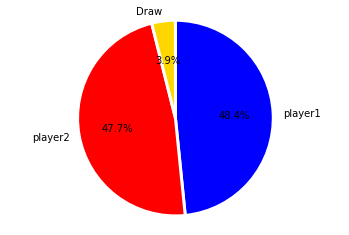

In [9]:
win_p1 = winner_player_list.count('player1')
win_p2 = winner_player_list.count('player2')
draw = winner_player_list.count('Draw')
count_of_all = win_p1 + win_p2 + draw

label = ['player1', 'player2', 'Draw']
colors = ['blue', 'red', 'gold']
x = np.array([win_p1, win_p2, draw])
plt.pie(x, labels=label, counterclock=False, startangle=90, colors=colors,
       wedgeprops={'linewidth': 3, 'edgecolor':"white"}, autopct="%1.1f%%")
plt.axis('equal')

# Specific hand

## Player1のハンドをAKsに固定

In [54]:
from texas_holdem import card

class Game:
    """class説明のタイトル
    classの説明文を記入

    Attributes:
        cards (list)    : cardオブジェクトをリストで保持します

    Examples:
        >>> game = Game()
        >>> game.progress() # ゲームスタート
    """

    def __init__(self, number_of_players=2):
        self.number_of_players = number_of_players
        self.players = []
        self.game_deck = deck.Deck()
        self.game_field = field.Field()

    def deal(self):

        for i in range(self.number_of_players):
            self.players.append(player.Player('player' + str(i+1)))
        
        for i in range(2):
            self.players[1].draw(self.game_deck)
        
        fix_hand = []
        fix_hand.append(card.Card('S', 1))
        fix_hand.append(card.Card('S', 13))
        self.players[0].hand = fix_hand
                
    def preflop(self):
        pass

    def flop(self):
        self.game_field.flop(self.game_deck)
        flop_card = self.game_field.community_card
        return flop_card

    def turn(self):
        self.game_field.turn(self.game_deck)
        turn_card = self.game_field.community_card[-1]
        return turn_card

    def river(self):
        self.game_field.river(self.game_deck)
        river_card = self.game_field.community_card[-1]
        return river_card

    def showdown(self):
        print(self.game_field.show_card())
        for i in range(self.number_of_players):
#             print("Player Name: {}".format(self.players[i].name))
#             print(self.players[i].show_hand())
            pass

    def judge_role(self):
        for i in range(self.number_of_players):
            self.game_role = role.Role()
            hand = self.players[i].hand + self.game_field.community_card
            self.game_role.judge(hand)
            self.players[i].role = self.game_role.role
            self.players[i].hand = self.game_role.hand

    def result_draw(self):
        print('Draw')

    def judge_winner(self):
        game_winner = winner.Winner(self.players)
        winner_index = game_winner.judge()
        if winner_index == -1:
#             self.result_draw()
            return 'Draw'
        else:
#             print(self.players[winner_index].name)
            return self.players[winner_index].name

    # ゲーム全体の進行
    def progress(self,
            preflop=False,
            flop=False,
            turn=False,
            river=False,
            winner=False):
        self.deal()
        self.preflop()
        flop_card = self.flop()
        turn_card = self.turn()
        river_card = self.river()
        self.showdown()
        self.judge_role()
        winner_player = self.judge_winner()
        if preflop:
            pass

        if flop:
            return flop_card

        if turn:
            return turn_card

        if river:
            return rever_card

        if winner:
            return winner_player

## only once

In [55]:
game = Game()
winner_player = game.progress(winner=True)

C4
H3
H7
S9
H10
None


In [56]:
winner_player

'player2'

## one hundred times

In [57]:
winner_player_list = []
for i in range(100):
    game = Game()
    winner_player_list.append(game.progress(winner=True))

H3
C10
S10
D9
C13
None
D4
D13
D7
D6
C10
None
C13
S7
S11
H13
S12
None
H12
C2
D1
C9
D6
None
C7
D7
C1
H5
S1
None
C11
S1
D8
D1
D5
None
D5
C9
H1
H12
D7
None
H8
C9
H3
C13
S2
None
S11
C12
D13
D11
C1
None
H2
S13
H10
C12
H5
None
H3
H7
D13
D8
S10
None
D6
C11
D8
S4
C7
None
C11
D12
C1
H13
S1
None
C10
H4
S10
H11
D1
None
S1
H7
C1
H9
D8
None
D1
H8
S8
C9
H6
None
C5
D8
D7
H7
D9
None
H5
H12
H1
C10
C7
None
D2
C9
S9
H1
C12
None
S1
C4
H4
H8
S12
None
C4
H4
D7
C13
C11
None
C13
C10
D9
D7
H9
None
H2
S10
C7
D9
H1
None
S4
S10
S1
H12
S9
None
D1
S6
D7
D13
C10
None
S2
C12
S10
H10
D9
None
S12
D8
D2
H12
S13
None
D12
C12
H1
S11
D7
None
S7
H10
D13
D11
D10
None
D5
H11
C4
S13
H8
None
H2
S11
C13
C4
S9
None
D2
S8
H9
S11
H2
None
H13
D8
C10
D10
C2
None
C3
C10
C2
S8
D9
None
D9
S12
S8
S10
S3
None
H10
C13
D6
H1
D10
None
D7
S6
S13
D11
H7
None
H10
C8
C5
H8
H7
None
H8
D10
C3
C12
C6
None
H12
C10
H10
C13
S7
None
S7
S12
H6
C10
D4
None
C13
D1
H5
H9
S8
None
S9
D9
H12
S4
D11
None
C11
S6
S13
S5
D9
None
D4
C9
S6
S2
S4
None
C2
C10
H13
H10


(-1.1343578172964877,
 1.1182887310401957,
 -1.1165586188345873,
 1.1007885114375362)

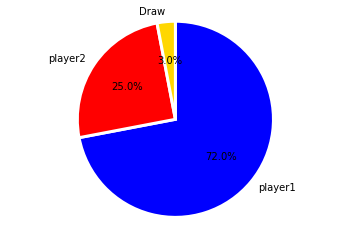

In [58]:
win_p1 = winner_player_list.count('player1')
win_p2 = winner_player_list.count('player2')
draw = winner_player_list.count('Draw')
count_of_all = win_p1 + win_p2 + draw

label = ['player1', 'player2', 'Draw']
colors = ['blue', 'red', 'gold']
x = np.array([win_p1, win_p2, draw])
plt.pie(x, labels=label, counterclock=False, startangle=90, colors=colors,
       wedgeprops={'linewidth': 3, 'edgecolor':"white"}, autopct="%1.1f%%")
plt.axis('equal')

## one thousand

In [60]:
winner_player_list = []
for i in range(1000):
    game = Game()
    winner_player_list.append(game.progress(winner=True))

D12
C13
D10
H10
C10
None
D13
H13
S8
S1
D6
None
S5
H1
C13
D10
S1
None
C8
H7
H1
D12
S3
None
C10
H11
C2
S9
C7
None
D8
C2
C11
C13
H10
None
C13
D3
H1
S10
S3
None
C7
H11
C3
C10
S4
None
D7
C2
C4
H11
H12
None
H1
H4
S2
C4
C8
None
S1
H13
C11
D12
C3
None
S7
D8
C1
C7
S12
None
S13
C9
S2
C7
D8
None
C3
H9
D6
D9
C8
None
H7
H1
C13
S4
D6
None
H3
D9
S11
D5
S7
None
H7
H3
S1
C9
S4
None
D6
S5
H8
S6
H6
None
H12
D9
H13
D12
H4
None
S11
H9
C7
C2
H7
None
S6
H5
C1
S13
D11
None
C13
S11
C6
D4
H10
None
S13
D6
S3
D10
H1
None
S9
H5
H1
D5
C5
None
H7
C10
D11
C7
S4
None
C4
S2
D7
D11
C5
None
C4
D8
S10
S5
H12
None
S5
H8
C8
S3
S7
None
D10
H2
S7
C3
S10
None
D13
H9
C9
H6
H5
None
C12
C4
H10
D2
C13
None
S2
H1
D6
H12
D12
None
S5
C11
H7
S9
C1
None
S6
H10
D13
S2
C13
None
C8
S1
H6
S5
H2
None
H6
C7
H12
H8
D11
None
D4
H9
D5
H11
D12
None
D12
D11
H5
D10
D5
None
H12
C2
H13
C7
S1
None
H2
S5
D11
D13
S1
None
D12
D4
C13
S8
D10
None
S8
D4
D12
S9
D13
None
C6
H5
C2
D8
S3
None
D8
H5
C6
D12
H6
None
D7
H1
S4
D5
H12
None
S2
C10
D10
D2
S3
None
C2
C

D4
S13
None
C10
S12
C13
S6
H1
None
D5
D9
D13
D3
S7
None
H11
C3
S2
H8
C11
None
D3
C8
D12
H11
H5
None
S7
D6
C2
D7
D3
None
D10
D13
C7
D11
D3
None
C7
S5
C13
C3
D8
None
S3
D1
H9
S10
D9
None
H8
C6
C12
D7
C10
None
D5
C12
H8
S5
H5
None
C6
C2
C3
S8
D13
None
C1
H9
H12
D3
H8
None
D1
C6
S8
C4
D12
None
H10
S8
C1
C13
D8
None
S12
C13
D6
H13
H6
None
C4
S6
D7
S7
D4
None
S6
H11
S13
D1
H3
None
D3
D13
C10
S9
C2
None
C10
H7
D11
D9
H4
None
C12
S7
D5
D13
S3
None
C9
D2
S7
H12
C4
None
C6
S5
H4
S4
D12
None
S11
H9
D1
C12
C1
None
C13
S5
H12
D5
S2
None
H8
C8
H10
D3
S13
None
H1
S11
S10
H12
S12
None
H7
D6
S8
S1
H9
None
H13
H3
S12
D4
H12
None
H12
H11
C13
C12
H6
None
H10
D1
C12
C13
D6
None
C11
D5
C7
D12
D3
None
H13
C8
D6
D10
S12
None
C4
C10
S1
C1
D8
None
C12
C7
S12
S3
D11
None
D7
D6
C11
S13
H5
None
D12
D3
S1
C10
C13
None
D9
S7
S8
C2
S13
None
C13
D7
S11
S8
H9
None
H12
H7
C7
C1
D13
None
C6
D9
H8
H3
C7
None
D3
H11
H3
H6
C11
None
S5
S8
C10
S1
H3
None
C12
S4
D11
S13
S11
None
S4
D13
D2
S5
H3
None
H2
H3
D10
S11
D9
None
S12
H

C5
S2
S13
C7
H11
None
H13
S11
D12
C1
H10
None
H3
D1
D12
H2
C11
None
S9
S2
C1
H3
S4
None
D5
D8
C10
H6
C11
None
C12
C11
D9
D2
D4
None
H13
C1
D3
C9
H10
None
H11
H7
S8
C11
C8
None
H2
H9
D2
S10
C3
None
S4
C11
D3
H9
S11
None
H8
S2
S12
S5
C11
None
H2
H13
S11
D6
H4
None
C2
H5
S13
S7
C6
None
S10
H11
H1
C1
C6
None
S7
S3
C1
D3
C2
None
C1
S12
C13
C5
H2
None
D12
S6
S11
H13
H9
None
C8
D5
C4
S9
D4
None
D7
S1
C8
S2
D13
None
D10
H3
S2
S6
C4
None
C1
S12
H6
C9
D5
None
S2
H6
S3
C4
C11
None
H8
C4
H11
C1
H10
None
H12
S5
C11
D10
D12
None
H9
D2
S6
D7
H5
None
H7
D5
C2
D3
D9
None
S10
C9
D8
S4
C7
None
H5
D8
D5
C12
H6
None
C7
C12
S11
S9
D1
None
H4
C7
C1
H8
D5
None
C3
S12
S4
H2
D3
None
C11
D6
H7
S3
H6
None
D12
C10
H12
C4
D7
None
D13
D2
C13
C12
C7
None
S5
C2
C13
H3
S9
None
S9
C5
D11
S11
D10
None
S6
S1
S2
S4
D7
None
D6
C13
D12
C5
C2
None
D9
C8
H9
H2
C10
None
D9
D3
S13
H5
C10
None
D9
D6
C5
H3
C12
None
D13
D12
H12
H13
D9
None
H12
H4
C12
H6
D13
None
C12
C9
D11
D3
C11
None
D11
C11
S13
H9
C4
None
D12
H9
C7
D3
D8
None
C3


(-1.110294113584958,
 1.1188161370634446,
 -1.1154179839356237,
 1.1007341927670806)

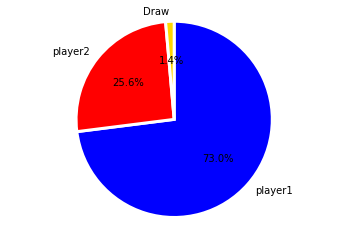

In [61]:
win_p1 = winner_player_list.count('player1')
win_p2 = winner_player_list.count('player2')
draw = winner_player_list.count('Draw')
count_of_all = win_p1 + win_p2 + draw

label = ['player1', 'player2', 'Draw']
colors = ['blue', 'red', 'gold']
x = np.array([win_p1, win_p2, draw])
plt.pie(x, labels=label, counterclock=False, startangle=90, colors=colors,
       wedgeprops={'linewidth': 3, 'edgecolor':"white"}, autopct="%1.1f%%")
plt.axis('equal')